In [ ]:
!pip install keras
!pip install tensorflow

In [0]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [0]:
def plot_data(pl, X, y):
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

In [0]:
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    plot_data(plt, X, y)

    return plt

In [0]:
X, y = make_blobs(n_samples=1000,\
                  centers=2, random_state=42)

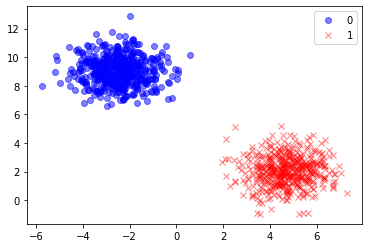

In [0]:
p1 = plot_data(plt, X, y)
p1.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, \
y_train, y_test = train_test_split(\
                                   X, y, test_size=0.3,\
                                   random_state=42)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

In [0]:
model.add(Dense(\
         1, input_shape=(2,),\
         activation="sigmoid"))

In [0]:
model.compile(Adam(\
                  learning_rate=0.05),\
                  'binary_crossentropy',\
                  metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, verbose=1)

In [ ]:
eval_result = model.evaluate(X_test, y_test)

In [ ]:
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

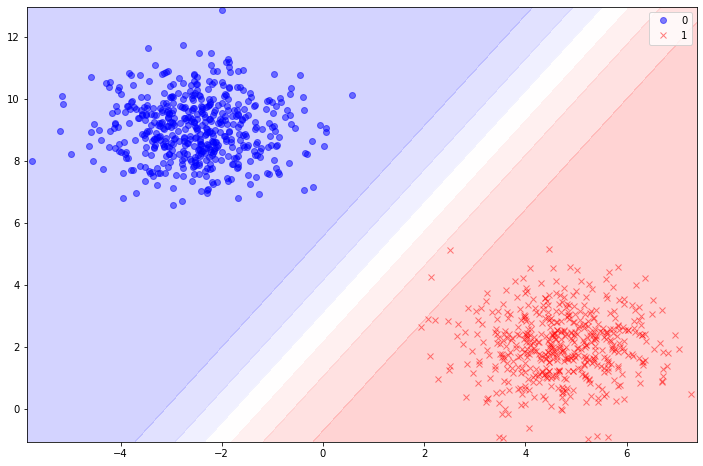

In [0]:
plot_decision_boundary(model, X, y).show()